## Data importing and splitting

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
data = pd.read_csv("train_emotion.csv")

In [110]:
data.head(10)

,text,emotion
0,Yeah for coupons! Found this place randomly ...,neutral
1,i still love to feel a gentle breeze and hear ...,happiness
2,"Normal, fama devido ao programa de tv. A sobre...",neutral
3,im feeling a little less jaded,sadness
4,i have never shaken the feeling of ferocious p...,hate
5,i figure my family loves us no matter what but...,sadness
6,i feel uncertain i will raise my,worry
7,i was feeling relaxed and quite comfortable at...,fun
8,i feel like ive lost everything and everyone,sadness
9,i feel this way is probably because i am dumb ...,sadness


In [111]:
X = data["text"]
y = data["emotion"]

In [112]:
y.value_counts() #relatively balanced dataset, the surpise emotion is the least populated one

happiness    1468
neutral      1292
worry        1222
fun          1157
sadness      1146
hate         1143
surprise      572
Name: emotion, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=52
)

In [114]:
len(X_train)

6400

In [115]:
len(X_test)

1600

### Label encoding

In [116]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [117]:
#y_train = y_train_enc
#y_test = y_test_enc
y_train

7011          fun
5480    happiness
3940    happiness
6642      sadness
823       neutral
          ...    
3519          fun
819           fun
2335    happiness
330     happiness
886       neutral
Name: emotion, Length: 6400, dtype: object

## First vectorization methods and models

In [118]:
from sklearn.metrics import accuracy_score, recall_score, classification_report

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import FunctionTransformer

In [120]:
def model_evaluation(pipeline):
    y_pred = pipeline.predict(X_test)
    print("\n Model Performance:")
    # print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    return accuracy

# Multinomial Naive Bayes with various vectorization techniques

## BOW - bag of words
Counts the number of times each word appears in a document.
<li>lots of dimensions</li>
<li>Simple, easy to understand.</li>
<li>ignores word order, context, and meaning</li>

In [121]:
bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

bow_pipeline.fit(X_train, y_train)
num_features = len(bow_pipeline.named_steps['vectorizer'].vocabulary_)
print("Number of features: ", num_features)

model_evaluation(bow_pipeline)

Number of features:  14101

 Model Performance:
Accuracy: 0.724375


0.724375

## N-grams
Considers sequences of n words to capture more context.
<li>Captures simple word combinations
<li>High dimensionality

In [122]:
bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(2, 3))),
    ('classifier', MultinomialNB())
])

bow_pipeline.fit(X_train, y_train)

num_features = len(bow_pipeline.named_steps['vectorizer'].vocabulary_)
print("Number of features: ", num_features)

model_evaluation(bow_pipeline)

Number of features:  285115

 Model Performance:
Accuracy: 0.514375


0.514375

## Experimenting with ngram_ranges

In [123]:
for i in range (1,5):
    for j in range(1,6):
        if i > j:
            continue
        bow_pipeline = Pipeline([
            ('vectorizer', CountVectorizer(ngram_range=(i, j))),
            ('classifier', MultinomialNB())
        ])
        
        bow_pipeline.fit(X_train, y_train)
        
        print(f"for ngram_range=({i},{j})")
        model_evaluation(bow_pipeline)
        print("")
        print("")
        print("")


for ngram_range=(1,1)

 Model Performance:
Accuracy: 0.724375



for ngram_range=(1,2)

 Model Performance:
Accuracy: 0.57125



for ngram_range=(1,3)

 Model Performance:
Accuracy: 0.508125



for ngram_range=(1,4)

 Model Performance:
Accuracy: 0.473125



for ngram_range=(1,5)

 Model Performance:
Accuracy: 0.46375



for ngram_range=(2,2)

 Model Performance:
Accuracy: 0.526875



for ngram_range=(2,3)

 Model Performance:
Accuracy: 0.514375



for ngram_range=(2,4)

 Model Performance:
Accuracy: 0.51



for ngram_range=(2,5)

 Model Performance:
Accuracy: 0.50625



for ngram_range=(3,3)

 Model Performance:
Accuracy: 0.418125



for ngram_range=(3,4)

 Model Performance:
Accuracy: 0.418125



for ngram_range=(3,5)

 Model Performance:
Accuracy: 0.4175



for ngram_range=(4,4)

 Model Performance:
Accuracy: 0.321875



for ngram_range=(4,5)

 Model Performance:
Accuracy: 0.321875





### The longer the sequence the worse the accuracy, the best performance is for simple BOW

## Experimenting with max_df/min_df argument 
ignore terms that have a document frequency strictly higher/lower than the given threshold

In [124]:
for max_ in [0.5,0.6,0.7,0.8,0.9]:
    for min_ in [0.1,0.2,0.3,0.4]:
        bow_pipeline = Pipeline([
            ('vectorizer', CountVectorizer(ngram_range=(1, 1), min_df=min_, max_df=max_)),
            ('classifier', MultinomialNB())
        ])
        
        bow_pipeline.fit(X_train, y_train)
        
        print(f"for min_df,max_df=({min_},{max_})")
        model_evaluation(bow_pipeline)
        print("")
        print("")
        print("")

for min_df,max_df=(0.1,0.5)

 Model Performance:
Accuracy: 0.30625



for min_df,max_df=(0.2,0.5)

 Model Performance:
Accuracy: 0.30375



for min_df,max_df=(0.3,0.5)

 Model Performance:
Accuracy: 0.250625



for min_df,max_df=(0.4,0.5)

 Model Performance:
Accuracy: 0.246875



for min_df,max_df=(0.1,0.6)

 Model Performance:
Accuracy: 0.340625



for min_df,max_df=(0.2,0.6)

 Model Performance:
Accuracy: 0.340625



for min_df,max_df=(0.3,0.6)

 Model Performance:
Accuracy: 0.291875



for min_df,max_df=(0.4,0.6)

 Model Performance:
Accuracy: 0.300625



for min_df,max_df=(0.1,0.7)

 Model Performance:
Accuracy: 0.340625



for min_df,max_df=(0.2,0.7)

 Model Performance:
Accuracy: 0.340625



for min_df,max_df=(0.3,0.7)

 Model Performance:
Accuracy: 0.291875



for min_df,max_df=(0.4,0.7)

 Model Performance:
Accuracy: 0.300625



for min_df,max_df=(0.1,0.8)

 Model Performance:
Accuracy: 0.340625



for min_df,max_df=(0.2,0.8)

 Model Performance:
Accuracy: 0.340625



for min_

### Changing those parameters decreases the performance as well

## Experimenting with max_features argument
only consider the top max_features ordered by term frequency <br>
for ngram_range(1,1) we found 14101 features

In [125]:
feature_number = []
accuraccies = []

for features in [k*500 for k in range(1,30)]:
    bow_pipeline = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 1), max_features = features)),
        ('classifier', MultinomialNB())
    ])
    
    bow_pipeline.fit(X_train, y_train)
    accuracy = model_evaluation(bow_pipeline)
    print(f"for max_fearures={features}")
    feature_number.append(features)
    accuraccies.append(accuracy)
    print("")
    print("")
    print("")


 Model Performance:
Accuracy: 0.461875
for max_fearures=500




 Model Performance:
Accuracy: 0.653125
for max_fearures=1000




 Model Performance:
Accuracy: 0.720625
for max_fearures=1500




 Model Performance:
Accuracy: 0.77125
for max_fearures=2000




 Model Performance:
Accuracy: 0.790625
for max_fearures=2500




 Model Performance:
Accuracy: 0.790625
for max_fearures=3000




 Model Performance:
Accuracy: 0.78875
for max_fearures=3500




 Model Performance:
Accuracy: 0.7875
for max_fearures=4000




 Model Performance:
Accuracy: 0.79
for max_fearures=4500




 Model Performance:
Accuracy: 0.78375
for max_fearures=5000




 Model Performance:
Accuracy: 0.785
for max_fearures=5500




 Model Performance:
Accuracy: 0.779375
for max_fearures=6000




 Model Performance:
Accuracy: 0.771875
for max_fearures=6500




 Model Performance:
Accuracy: 0.76875
for max_fearures=7000




 Model Performance:
Accuracy: 0.76875
for max_fearures=7500




 Model Performance:
Accuracy: 0.765625


In [126]:
def plot_features_vs_accuracy(feature_number,accuraccies):
    plt.plot(feature_number, accuraccies)
    max_index = np.argmax(accuraccies)
    max_f = feature_number[max_index]
    max_acc = accuraccies[max_index]
    
    plt.annotate(
        f"({max_f:.0f}, {max_acc:.3f})",
        (max_f, max_acc),
        textcoords="offset points",
        xytext=(20, 10),  # Move to the right and down
        ha="left",
        fontsize=9,
        color="black",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightyellow")
    )
    plt.xlabel("Number of features")
    plt.ylabel("Accuracy")

### Best for 3500 out of around 14000 features, accuracy = 0,789

let's now see how many features are found in ngram_range = (1,2)

In [127]:

bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier', MultinomialNB())
])


bow_pipeline.fit(X_train, y_train)


num_features = len(bow_pipeline.named_steps['vectorizer'].vocabulary_)
print("this many features were found: ", num_features)


this many features were found:  118489


In [128]:
for features in [int(k*10000) for k in [0.3,1,2,3,4,5,6,7,8,9,10,11]]:
    bow_pipeline = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2), max_features = features)),
        ('classifier', MultinomialNB())
    ])
    bow_pipeline.fit(X_train, y_train)
    print(f"for max_fearures={features}")
    model_evaluation(bow_pipeline)
    print("")
    print("")
    print("")

for max_fearures=3000

 Model Performance:
Accuracy: 0.67125



for max_fearures=10000

 Model Performance:
Accuracy: 0.724375



for max_fearures=20000

 Model Performance:
Accuracy: 0.715625



for max_fearures=30000

 Model Performance:
Accuracy: 0.705625



for max_fearures=40000

 Model Performance:
Accuracy: 0.685625



for max_fearures=50000

 Model Performance:
Accuracy: 0.66625



for max_fearures=60000

 Model Performance:
Accuracy: 0.64625



for max_fearures=70000

 Model Performance:
Accuracy: 0.6225



for max_fearures=80000

 Model Performance:
Accuracy: 0.604375



for max_fearures=90000

 Model Performance:
Accuracy: 0.595



for max_fearures=100000

 Model Performance:
Accuracy: 0.5825



for max_fearures=110000

 Model Performance:
Accuracy: 0.575625





we can see that the results are worse than for ngram_range(1,1)<br><br>
what about ngram_range=(2,2)? basically ensuring that we use two-word features

In [129]:
def vectorizer_ngram(from_, to_,vectorizer):
    feature_number = []
    accuraccies = []
    bow_pipeline = Pipeline([
        ('vectorizer', vectorizer(ngram_range=(from_, to_))),
        ('classifier', MultinomialNB())
    ])
    
    bow_pipeline.fit(X_train, y_train)
    
    
    num_features = len(bow_pipeline.named_steps['vectorizer'].vocabulary_)
    print("this many features were found: ", num_features, "\n")
    
    for features in [k for k in [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]]:
        number =features*num_features//100
        bow_pipeline = Pipeline([
            ('vectorizer', vectorizer(ngram_range=(from_, to_), max_features = number)),
            ('classifier', MultinomialNB())
        ])
        
        bow_pipeline.fit(X_train, y_train)
        
        # acc = model_evaluation(bow_pipeline)
        y_pred = bow_pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        feature_number.append(number)
        accuraccies.append(acc)
        print(f"{number} features ({features}%) -> Accuracy: {acc}")

        print("")

        print("")
    return [feature_number, accuraccies]

In [130]:
[feature_number,accuracies] = vectorizer_ngram(2,2, CountVectorizer)

this many features were found:  104388 

5219 features (5%) -> Accuracy: 0.478125


10438 features (10%) -> Accuracy: 0.51875


15658 features (15%) -> Accuracy: 0.5475


20877 features (20%) -> Accuracy: 0.553125


26097 features (25%) -> Accuracy: 0.559375


31316 features (30%) -> Accuracy: 0.5475


36535 features (35%) -> Accuracy: 0.54


41755 features (40%) -> Accuracy: 0.535625


46974 features (45%) -> Accuracy: 0.531875


52194 features (50%) -> Accuracy: 0.53


57413 features (55%) -> Accuracy: 0.528125


62632 features (60%) -> Accuracy: 0.528125


67852 features (65%) -> Accuracy: 0.523125


73071 features (70%) -> Accuracy: 0.52375


78291 features (75%) -> Accuracy: 0.52375


83510 features (80%) -> Accuracy: 0.523125


88729 features (85%) -> Accuracy: 0.520625


93949 features (90%) -> Accuracy: 0.51625




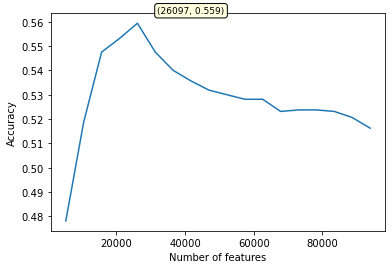

In [131]:
plot_features_vs_accuracy(feature_number, accuracies)

we see that we perform better when we have singular words as features, so we will stick with:

Pipeline([<br>
            ('vectorizer', CountVectorizer(ngram_range=(1, 1), max_features = 3000)),<br>
            ('classifier', MultinomialNB())<br>
        ])


## Experimenting with max_features argument combined with stop_words = {'english'}


In [209]:
def vectorizer_ngram_stopwords(from_, to_,vectorizer,sub_tf=False, model = MultinomialNB()):
    feature_number = []
    accuraccies = []

    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)

    
    if vectorizer == CountVectorizer:
        bow_pipeline = Pipeline([
            ('vectorizer', vectorizer(ngram_range=(from_, to_), stop_words='english')),
            ('classifier', model)
        ])
    else:
        bow_pipeline = Pipeline([
            ('vectorizer', vectorizer(ngram_range=(from_, to_), stop_words='english', sublinear_tf=sub_tf)),
            ('classifier', model)
        ])
        
    bow_pipeline.fit(X_train, y_train_enc)
    
    
    num_features = len(bow_pipeline.named_steps['vectorizer'].vocabulary_)
    print("this many features were found: ", num_features, "\n")

    
    
    
    for features in [k for k in [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]]:
        number =features*num_features//100
        if vectorizer == CountVectorizer:
            bow_pipeline = Pipeline([
                ('vectorizer', vectorizer(ngram_range=(from_, to_), stop_words='english', max_features = number)),
                ('classifier', model)
            ])
        else:
            bow_pipeline = Pipeline([
                ('vectorizer', vectorizer(ngram_range=(from_, to_), stop_words='english', sublinear_tf=sub_tf, max_features = number)),
                ('classifier', model)
            ])
        
        bow_pipeline.fit(X_train, y_train_enc)
        
        # acc = model_evaluation(bow_pipeline)
        y_pred_enc = bow_pipeline.predict(X_test)
        y_pred = le.inverse_transform(y_pred_enc)
        acc = accuracy_score(y_test, y_pred)
        feature_number.append(number)
        accuraccies.append(acc)
        print(f"{number} features ({features}%) -> Accuracy: {acc}")

        # print("")
    return [feature_number,accuraccies]

In [133]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,1,CountVectorizer)

this many features were found:  13807 

690 features (5%) -> Accuracy: 0.5975
1380 features (10%) -> Accuracy: 0.7625
2071 features (15%) -> Accuracy: 0.810625
2761 features (20%) -> Accuracy: 0.816875
3451 features (25%) -> Accuracy: 0.81875
4142 features (30%) -> Accuracy: 0.8225
4832 features (35%) -> Accuracy: 0.8225
5522 features (40%) -> Accuracy: 0.816875
6213 features (45%) -> Accuracy: 0.813125
6903 features (50%) -> Accuracy: 0.81125
7593 features (55%) -> Accuracy: 0.80875
8284 features (60%) -> Accuracy: 0.805
8974 features (65%) -> Accuracy: 0.805
9664 features (70%) -> Accuracy: 0.803125
10355 features (75%) -> Accuracy: 0.800625
11045 features (80%) -> Accuracy: 0.8
11735 features (85%) -> Accuracy: 0.798125
12426 features (90%) -> Accuracy: 0.794375
13116 features (95%) -> Accuracy: 0.793125
13807 features (100%) -> Accuracy: 0.7925


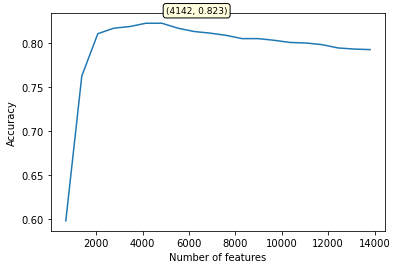

In [134]:
plot_features_vs_accuracy(feature_number, accuracies)

for 4142 features (30%) and 4832 features (35%) we got accuracy=0.8225 so increase by 3%<br>
maybe with other ranges?

In [135]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2,CountVectorizer)

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.82625
9640 features (10%) -> Accuracy: 0.82
14460 features (15%) -> Accuracy: 0.819375
19280 features (20%) -> Accuracy: 0.819375
24100 features (25%) -> Accuracy: 0.81625
28920 features (30%) -> Accuracy: 0.8075
33740 features (35%) -> Accuracy: 0.8
38560 features (40%) -> Accuracy: 0.7975
43380 features (45%) -> Accuracy: 0.791875
48200 features (50%) -> Accuracy: 0.786875
53020 features (55%) -> Accuracy: 0.78375
57840 features (60%) -> Accuracy: 0.780625
62660 features (65%) -> Accuracy: 0.780625
67480 features (70%) -> Accuracy: 0.78
72300 features (75%) -> Accuracy: 0.778125
77120 features (80%) -> Accuracy: 0.775625
81940 features (85%) -> Accuracy: 0.775
86760 features (90%) -> Accuracy: 0.779375
91580 features (95%) -> Accuracy: 0.78
96401 features (100%) -> Accuracy: 0.779375


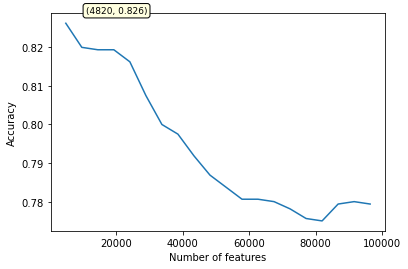

In [136]:
plot_features_vs_accuracy(feature_number, accuracies)

#### single words!!!!!
the best accuracy we have ever got and it's for 5% of all features.<br>
we can suspect that the most common words are single words + it's around 4000/5000 words,<br> so the same number 
as we got in the previous example, that included only single words, <br> so single words is DEFINITELY the way to go 

In [137]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(2,2,CountVectorizer)

this many features were found:  82594 

4129 features (5%) -> Accuracy: 0.606875
8259 features (10%) -> Accuracy: 0.64625
12389 features (15%) -> Accuracy: 0.648125
16518 features (20%) -> Accuracy: 0.6475
20648 features (25%) -> Accuracy: 0.650625
24778 features (30%) -> Accuracy: 0.650625
28907 features (35%) -> Accuracy: 0.649375
33037 features (40%) -> Accuracy: 0.650625
37167 features (45%) -> Accuracy: 0.649375
41297 features (50%) -> Accuracy: 0.645625
45426 features (55%) -> Accuracy: 0.6475
49556 features (60%) -> Accuracy: 0.65
53686 features (65%) -> Accuracy: 0.65125
57815 features (70%) -> Accuracy: 0.6525
61945 features (75%) -> Accuracy: 0.651875
66075 features (80%) -> Accuracy: 0.65375
70204 features (85%) -> Accuracy: 0.654375
74334 features (90%) -> Accuracy: 0.67125
78464 features (95%) -> Accuracy: 0.67375
82594 features (100%) -> Accuracy: 0.673125


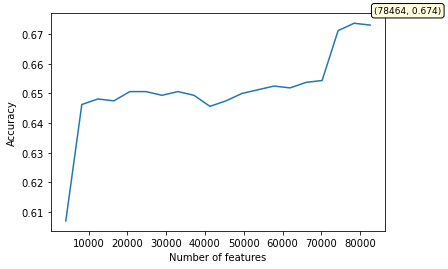

In [138]:
plot_features_vs_accuracy(feature_number, accuracies)

again, the model needs single words to perform

### but using stop_words = 'english' is beneficial

## TF-IDF (Term Frequency-Inverse Document Frequency)
Weighs word frequency by how common it is across all documents.<br>
Multiplies two values:
<li>TF (Term Frequency) = Frequency of a term in a document.
<li>IDF (Inverse Document Frequency) = Inverse of how many documents contain the term.
<br>
Reduces the impact of common but less informative words, but ignores word order.

In [139]:
tfidf_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

tfidf_pipeline.fit(X_train, y_train)

model_evaluation(tfidf_pipeline)


 Model Performance:
Accuracy: 0.651875


0.651875

let's also see how does this vectorizer perform with different ngram_range/max_features values

this many features were found:  14101 

705 features (5%) -> Accuracy: 0.523125


1410 features (10%) -> Accuracy: 0.70875


2115 features (15%) -> Accuracy: 0.755


2820 features (20%) -> Accuracy: 0.75875


3525 features (25%) -> Accuracy: 0.755625


4230 features (30%) -> Accuracy: 0.753125


4935 features (35%) -> Accuracy: 0.745625


5640 features (40%) -> Accuracy: 0.735


6345 features (45%) -> Accuracy: 0.726875


7050 features (50%) -> Accuracy: 0.7175


7755 features (55%) -> Accuracy: 0.70625


8460 features (60%) -> Accuracy: 0.69875


9165 features (65%) -> Accuracy: 0.69125


9870 features (70%) -> Accuracy: 0.684375


10575 features (75%) -> Accuracy: 0.676875


11280 features (80%) -> Accuracy: 0.669375


11985 features (85%) -> Accuracy: 0.66625


12690 features (90%) -> Accuracy: 0.663125




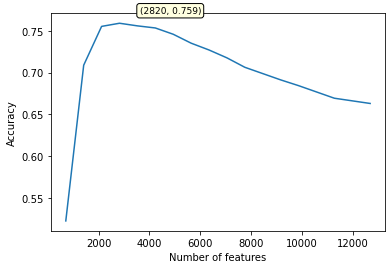

In [140]:
[feature_number,accuracies] = vectorizer_ngram(1,1, TfidfVectorizer)
plot_features_vs_accuracy(feature_number, accuracies)

worse than for the first vectorizer, let's see with other ngram_values

this many features were found:  118489 

5924 features (5%) -> Accuracy: 0.694375


11848 features (10%) -> Accuracy: 0.689375


17773 features (15%) -> Accuracy: 0.66625


23697 features (20%) -> Accuracy: 0.644375


29622 features (25%) -> Accuracy: 0.638125


35546 features (30%) -> Accuracy: 0.623125


41471 features (35%) -> Accuracy: 0.609375


47395 features (40%) -> Accuracy: 0.5975


53320 features (45%) -> Accuracy: 0.5925


59244 features (50%) -> Accuracy: 0.584375


65168 features (55%) -> Accuracy: 0.578125


71093 features (60%) -> Accuracy: 0.57375


77017 features (65%) -> Accuracy: 0.57


82942 features (70%) -> Accuracy: 0.56625


88866 features (75%) -> Accuracy: 0.5625


94791 features (80%) -> Accuracy: 0.560625


100715 features (85%) -> Accuracy: 0.554375


106640 features (90%) -> Accuracy: 0.550625




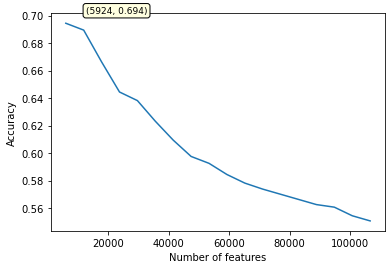

In [141]:
[feature_number,accuracies] = vectorizer_ngram(1,2, TfidfVectorizer)
plot_features_vs_accuracy(feature_number, accuracies)

this many features were found:  104388 

5219 features (5%) -> Accuracy: 0.474375


10438 features (10%) -> Accuracy: 0.518125


15658 features (15%) -> Accuracy: 0.5375


20877 features (20%) -> Accuracy: 0.535625


26097 features (25%) -> Accuracy: 0.539375


31316 features (30%) -> Accuracy: 0.530625


36535 features (35%) -> Accuracy: 0.5225


41755 features (40%) -> Accuracy: 0.52


46974 features (45%) -> Accuracy: 0.52125


52194 features (50%) -> Accuracy: 0.51875


57413 features (55%) -> Accuracy: 0.51625


62632 features (60%) -> Accuracy: 0.515


67852 features (65%) -> Accuracy: 0.515625


73071 features (70%) -> Accuracy: 0.514375


78291 features (75%) -> Accuracy: 0.515


83510 features (80%) -> Accuracy: 0.51625


88729 features (85%) -> Accuracy: 0.513125


93949 features (90%) -> Accuracy: 0.51375




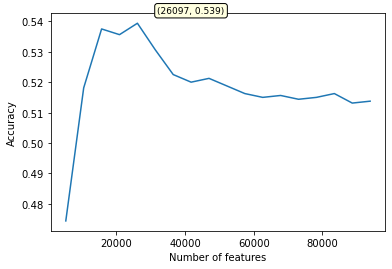

In [142]:
[feature_number,accuracies] = vectorizer_ngram(2,2, TfidfVectorizer)
plot_features_vs_accuracy(feature_number, accuracies)

this many features were found:  285115 

14255 features (5%) -> Accuracy: 0.49625


28511 features (10%) -> Accuracy: 0.51


42767 features (15%) -> Accuracy: 0.51875


57023 features (20%) -> Accuracy: 0.511875


71278 features (25%) -> Accuracy: 0.50625


85534 features (30%) -> Accuracy: 0.501875


99790 features (35%) -> Accuracy: 0.50375


114046 features (40%) -> Accuracy: 0.500625


128301 features (45%) -> Accuracy: 0.499375


142557 features (50%) -> Accuracy: 0.495625


156813 features (55%) -> Accuracy: 0.494375


171069 features (60%) -> Accuracy: 0.489375


185324 features (65%) -> Accuracy: 0.488125


199580 features (70%) -> Accuracy: 0.4875


213836 features (75%) -> Accuracy: 0.48875


228092 features (80%) -> Accuracy: 0.484375


242347 features (85%) -> Accuracy: 0.48375


256603 features (90%) -> Accuracy: 0.48375




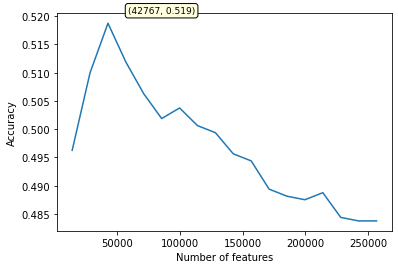

In [143]:
[feature_number,accuracies] = vectorizer_ngram(2,3, TfidfVectorizer)
plot_features_vs_accuracy(feature_number, accuracies)

as we can see, approach with this particular vectorizer is just worse<br>
maybe stop_words will change something? <br>only for ngram_range = (1,1) and (1,2) so to have single words

### experimenting with the TfidfVectorizer and stop_words = 'english'

this many features were found:  13807 

690 features (5%) -> Accuracy: 0.609375
1380 features (10%) -> Accuracy: 0.75125
2071 features (15%) -> Accuracy: 0.803125
2761 features (20%) -> Accuracy: 0.80875
3451 features (25%) -> Accuracy: 0.8125
4142 features (30%) -> Accuracy: 0.81125
4832 features (35%) -> Accuracy: 0.8125
5522 features (40%) -> Accuracy: 0.808125
6213 features (45%) -> Accuracy: 0.805
6903 features (50%) -> Accuracy: 0.79875
7593 features (55%) -> Accuracy: 0.79875
8284 features (60%) -> Accuracy: 0.79125
8974 features (65%) -> Accuracy: 0.786875
9664 features (70%) -> Accuracy: 0.78625
10355 features (75%) -> Accuracy: 0.78375
11045 features (80%) -> Accuracy: 0.780625
11735 features (85%) -> Accuracy: 0.77875
12426 features (90%) -> Accuracy: 0.77625
13116 features (95%) -> Accuracy: 0.775625
13807 features (100%) -> Accuracy: 0.775625


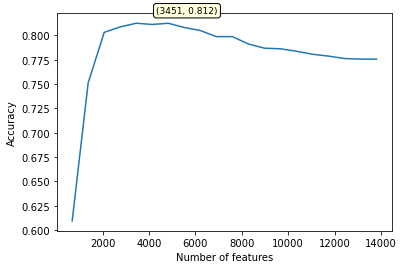

In [206]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,1,TfidfVectorizer)
plot_features_vs_accuracy(feature_number, accuracies)

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.815
9640 features (10%) -> Accuracy: 0.816875
14460 features (15%) -> Accuracy: 0.810625
19280 features (20%) -> Accuracy: 0.796875
24100 features (25%) -> Accuracy: 0.791875
28920 features (30%) -> Accuracy: 0.785
33740 features (35%) -> Accuracy: 0.78125
38560 features (40%) -> Accuracy: 0.776875
43380 features (45%) -> Accuracy: 0.77375
48200 features (50%) -> Accuracy: 0.77125
53020 features (55%) -> Accuracy: 0.77375
57840 features (60%) -> Accuracy: 0.773125
62660 features (65%) -> Accuracy: 0.77125
67480 features (70%) -> Accuracy: 0.77125
72300 features (75%) -> Accuracy: 0.7675
77120 features (80%) -> Accuracy: 0.768125
81940 features (85%) -> Accuracy: 0.7675
86760 features (90%) -> Accuracy: 0.764375
91580 features (95%) -> Accuracy: 0.764375
96401 features (100%) -> Accuracy: 0.763125


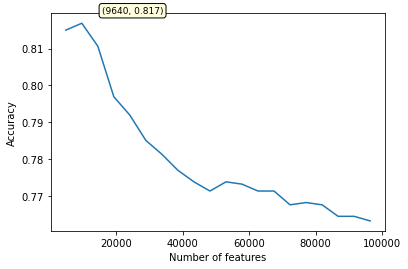

In [145]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2,TfidfVectorizer)
plot_features_vs_accuracy(feature_number, accuracies)

for ngram_range=(1,1) the accuracy score is close to the CountVectorizer, but slightly worse

### experimenting with the TfidfVectorizer and sublinear_tf=True
This is called sublinear scaling, and it dampens the effect of very frequent words. Instead of letting the frequency grow linearly, it grows logarithmically.

this many features were found:  13807 

690 features (5%) -> Accuracy: 0.610625
1380 features (10%) -> Accuracy: 0.75125
2071 features (15%) -> Accuracy: 0.80625
2761 features (20%) -> Accuracy: 0.81
3451 features (25%) -> Accuracy: 0.81375
4142 features (30%) -> Accuracy: 0.81375
4832 features (35%) -> Accuracy: 0.81375
5522 features (40%) -> Accuracy: 0.809375
6213 features (45%) -> Accuracy: 0.806875
6903 features (50%) -> Accuracy: 0.8025
7593 features (55%) -> Accuracy: 0.799375
8284 features (60%) -> Accuracy: 0.795
8974 features (65%) -> Accuracy: 0.793125
9664 features (70%) -> Accuracy: 0.788125
10355 features (75%) -> Accuracy: 0.785625
11045 features (80%) -> Accuracy: 0.783125
11735 features (85%) -> Accuracy: 0.780625
12426 features (90%) -> Accuracy: 0.78
13116 features (95%) -> Accuracy: 0.77875
13807 features (100%) -> Accuracy: 0.7775


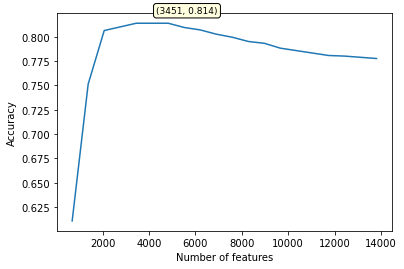

In [146]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,1,TfidfVectorizer, sub_tf = True)
plot_features_vs_accuracy(feature_number, accuracies)

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.81875
9640 features (10%) -> Accuracy: 0.819375
14460 features (15%) -> Accuracy: 0.813125
19280 features (20%) -> Accuracy: 0.801875
24100 features (25%) -> Accuracy: 0.793125
28920 features (30%) -> Accuracy: 0.7875
33740 features (35%) -> Accuracy: 0.78125
38560 features (40%) -> Accuracy: 0.77625
43380 features (45%) -> Accuracy: 0.775625
48200 features (50%) -> Accuracy: 0.77375
53020 features (55%) -> Accuracy: 0.774375
57840 features (60%) -> Accuracy: 0.775
62660 features (65%) -> Accuracy: 0.773125
67480 features (70%) -> Accuracy: 0.7725
72300 features (75%) -> Accuracy: 0.77
77120 features (80%) -> Accuracy: 0.77
81940 features (85%) -> Accuracy: 0.77
86760 features (90%) -> Accuracy: 0.768125
91580 features (95%) -> Accuracy: 0.768125
96401 features (100%) -> Accuracy: 0.765625


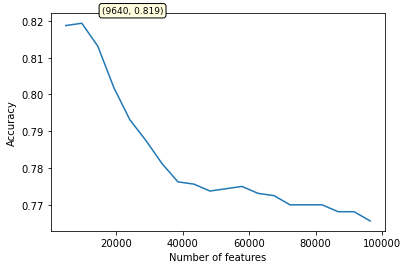

In [185]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2,TfidfVectorizer, sub_tf = True)
plot_features_vs_accuracy(feature_number, accuracies)

improves the performance a little bit but it's still worse than CountVectorizer

### experimenting with arguments of the MultinomialNB itself

MultinomialNB(alfa = [0.8, 0.5, 0.1, 0.01, 0.001]) 

In [148]:
def alfa_arg_vectorizer(from_, to_, vectorizer, alpha = [1.0,0.9,0.8, 0.5, 0.1, 0.01, 0.001]):
    for a in alpha:
        print(f"vectorizer: {vectorizer}")
        print(f"range: {from_} - {to_}")
        print(f"alpha = {a}")
        print("")
        [feature_number,accuracies] = vectorizer_ngram_stopwords(from_,to_, vectorizer, sub_tf=True, model = MultinomialNB(alpha=a))
        plot_features_vs_accuracy(feature_number, accuracies)
        print(max(accuracies))
        print("")
        print("")
        print("")        

vectorizer: <class 'sklearn.feature_extraction.text.CountVectorizer'>
range: 1 - 1
alpha = 1.0

this many features were found:  13807 

690 features (5%) -> Accuracy: 0.5975
1380 features (10%) -> Accuracy: 0.7625
2071 features (15%) -> Accuracy: 0.810625
2761 features (20%) -> Accuracy: 0.816875
3451 features (25%) -> Accuracy: 0.81875
4142 features (30%) -> Accuracy: 0.8225
4832 features (35%) -> Accuracy: 0.8225
5522 features (40%) -> Accuracy: 0.816875
6213 features (45%) -> Accuracy: 0.813125
6903 features (50%) -> Accuracy: 0.81125
7593 features (55%) -> Accuracy: 0.80875
8284 features (60%) -> Accuracy: 0.805
8974 features (65%) -> Accuracy: 0.805
9664 features (70%) -> Accuracy: 0.803125
10355 features (75%) -> Accuracy: 0.800625
11045 features (80%) -> Accuracy: 0.8
11735 features (85%) -> Accuracy: 0.798125
12426 features (90%) -> Accuracy: 0.794375
13116 features (95%) -> Accuracy: 0.793125
13807 features (100%) -> Accuracy: 0.7925
0.8225



vectorizer: <class 'sklearn.featu

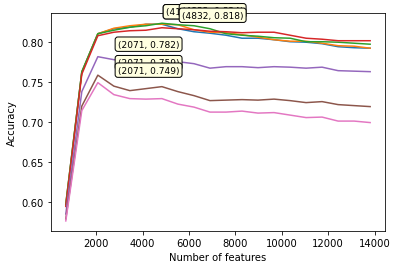

In [149]:
alfa_arg_vectorizer(1,1,CountVectorizer)

looks the best for alpha = 0.8 but the margin is too small to say that it improves the model 

vectorizer: <class 'sklearn.feature_extraction.text.CountVectorizer'>
range: 1 - 2
alpha = 1.0

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.82625
9640 features (10%) -> Accuracy: 0.82
14460 features (15%) -> Accuracy: 0.819375
19280 features (20%) -> Accuracy: 0.819375
24100 features (25%) -> Accuracy: 0.81625
28920 features (30%) -> Accuracy: 0.8075
33740 features (35%) -> Accuracy: 0.8
38560 features (40%) -> Accuracy: 0.7975
43380 features (45%) -> Accuracy: 0.791875
48200 features (50%) -> Accuracy: 0.786875
53020 features (55%) -> Accuracy: 0.78375
57840 features (60%) -> Accuracy: 0.780625
62660 features (65%) -> Accuracy: 0.780625
67480 features (70%) -> Accuracy: 0.78
72300 features (75%) -> Accuracy: 0.778125
77120 features (80%) -> Accuracy: 0.775625
81940 features (85%) -> Accuracy: 0.775
86760 features (90%) -> Accuracy: 0.779375
91580 features (95%) -> Accuracy: 0.78
96401 features (100%) -> Accuracy: 0.779375
0.82625



vectorizer: <class 'sk

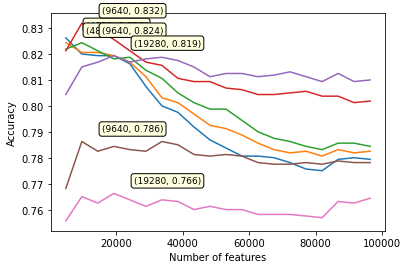

In [150]:
alfa_arg_vectorizer(1,2,CountVectorizer)

here for the other range (1,2) we got a slightly better performance for alpha = 0.5 

vectorizer: <class 'sklearn.feature_extraction.text.CountVectorizer'>
range: 1 - 2
alpha = 0.5

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.82125
9640 features (10%) -> Accuracy: 0.831875
14460 features (15%) -> Accuracy: 0.829375
19280 features (20%) -> Accuracy: 0.825625
24100 features (25%) -> Accuracy: 0.82125
28920 features (30%) -> Accuracy: 0.816875
33740 features (35%) -> Accuracy: 0.815625
38560 features (40%) -> Accuracy: 0.810625
43380 features (45%) -> Accuracy: 0.809375
48200 features (50%) -> Accuracy: 0.809375
53020 features (55%) -> Accuracy: 0.806875
57840 features (60%) -> Accuracy: 0.80625
62660 features (65%) -> Accuracy: 0.804375
67480 features (70%) -> Accuracy: 0.804375
72300 features (75%) -> Accuracy: 0.805
77120 features (80%) -> Accuracy: 0.805625
81940 features (85%) -> Accuracy: 0.80375
86760 features (90%) -> Accuracy: 0.80375
91580 features (95%) -> Accuracy: 0.80125
96401 features (100%) -> Accuracy: 0.801875
0.831875





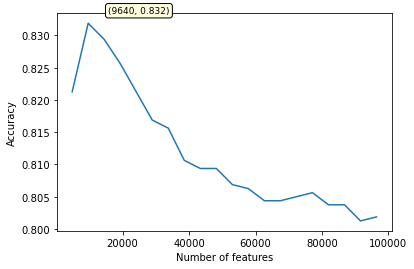

In [192]:
alfa_arg_vectorizer(1,2,CountVectorizer, [0.5])

the best performance so for 10% of all features (9640) while range = (1,2) and alpha = 0.5 -> accuracy = 0.832

## More complex, pretrained methods - for fun :)

## BERT (Deep Contextual Embeddings) - way more computationally intensive
(Bidirectional Encoder Representations from Transformers)<br>
Uses transformer layers to capture word meaning in context.
<li>State-of-the-art for many NLP tasks, handles context well.
<li>Computationally expensive.

In [180]:
# from transformers import BertTokenizer, BertModel
# import torch

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# def bert_embed(texts):
#     inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=128)
#     with torch.no_grad():
#         outputs = model(**inputs)
#     return outputs.last_hidden_state.mean(dim=1).numpy()

# X_train_vec = bert_embed(list(X_train))
# X_test_vec = bert_embed(list(X_test))

# # Train and evaluate
# model = GaussianNB()
# model.fit(X_train_vec, y_train_enc)
# y_pred = model.predict(X_test_vec)

# print("\nBERT Model Performance:")
# print(classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_))
# print("Accuracy:", accuracy_score(y_test_enc, y_pred))


## For further investigation we will use the more simple method, BOW
BOW is very easy to understand and work with. Further in this document we will test other models than MultinominalNB. We will try to find a few models that conquer this task and try to ensamble than using various ensambling method (for example model voting). We will test Logistic Regression, Support Vector Machines (SVM), K-Nearest Neighbors (KNN) and some simple Neural Networks.

# SVM

In [153]:
from sklearn.svm import LinearSVC

we will use Linear version of SVM as it is optimized for high dimensional input<br><br>
let's use for now use the basic pipeline with both vectorizers

this many features were found:  13807 

690 features (5%) -> Accuracy: 0.64125
1380 features (10%) -> Accuracy: 0.799375
2071 features (15%) -> Accuracy: 0.86125
2761 features (20%) -> Accuracy: 0.868125
3451 features (25%) -> Accuracy: 0.878125
4142 features (30%) -> Accuracy: 0.8875
4832 features (35%) -> Accuracy: 0.888125
5522 features (40%) -> Accuracy: 0.888125
6213 features (45%) -> Accuracy: 0.89125
6903 features (50%) -> Accuracy: 0.8925
7593 features (55%) -> Accuracy: 0.893125
8284 features (60%) -> Accuracy: 0.89625
8974 features (65%) -> Accuracy: 0.895625
9664 features (70%) -> Accuracy: 0.89375
10355 features (75%) -> Accuracy: 0.8925
11045 features (80%) -> Accuracy: 0.894375
11735 features (85%) -> Accuracy: 0.894375
12426 features (90%) -> Accuracy: 0.894375
13116 features (95%) -> Accuracy: 0.8925
13807 features (100%) -> Accuracy: 0.89375


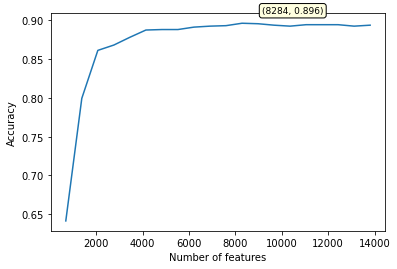

In [154]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,1, CountVectorizer, model = LinearSVC(dual=True)) 
plot_features_vs_accuracy(feature_number, accuracies)

# dual parameter controls which optimization problem to solve:
# dual=True: Solves the dual problem (better when n_features > n_samples)
# dual=False: Solves the primal problem (better when n_samples > n_features)

this many features were found:  13807 

690 features (5%) -> Accuracy: 0.64125
1380 features (10%) -> Accuracy: 0.799375
2071 features (15%) -> Accuracy: 0.86125
2761 features (20%) -> Accuracy: 0.868125
3451 features (25%) -> Accuracy: 0.878125
4142 features (30%) -> Accuracy: 0.8875
4832 features (35%) -> Accuracy: 0.8875
5522 features (40%) -> Accuracy: 0.888125
6213 features (45%) -> Accuracy: 0.89125
6903 features (50%) -> Accuracy: 0.8925
7593 features (55%) -> Accuracy: 0.893125
8284 features (60%) -> Accuracy: 0.89625
8974 features (65%) -> Accuracy: 0.895625
9664 features (70%) -> Accuracy: 0.89375
10355 features (75%) -> Accuracy: 0.8925
11045 features (80%) -> Accuracy: 0.894375
11735 features (85%) -> Accuracy: 0.894375
12426 features (90%) -> Accuracy: 0.894375
13116 features (95%) -> Accuracy: 0.8925
13807 features (100%) -> Accuracy: 0.89375


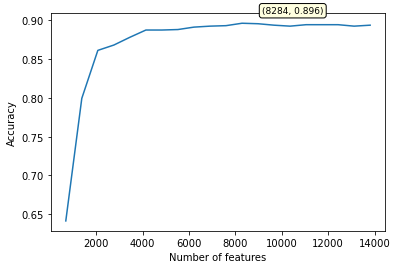

In [155]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,1, CountVectorizer, model = LinearSVC(dual='auto')) 
plot_features_vs_accuracy(feature_number, accuracies)
#adding dual='auto' to surpress the warning and choose automatically

we can see that the SVM instantly works A LOT better without too much work, <br>
the difference is that the more features it gets the better it works<br>
now let's experiment a bit

let's see how does the other vectorizer manage our data

this many features were found:  13807 

690 features (5%) -> Accuracy: 0.639375
1380 features (10%) -> Accuracy: 0.808125
2071 features (15%) -> Accuracy: 0.869375
2761 features (20%) -> Accuracy: 0.88125
3451 features (25%) -> Accuracy: 0.88625
4142 features (30%) -> Accuracy: 0.889375
4832 features (35%) -> Accuracy: 0.891875
5522 features (40%) -> Accuracy: 0.89125
6213 features (45%) -> Accuracy: 0.8925
6903 features (50%) -> Accuracy: 0.895
7593 features (55%) -> Accuracy: 0.895
8284 features (60%) -> Accuracy: 0.898125
8974 features (65%) -> Accuracy: 0.898125
9664 features (70%) -> Accuracy: 0.89875
10355 features (75%) -> Accuracy: 0.899375
11045 features (80%) -> Accuracy: 0.899375
11735 features (85%) -> Accuracy: 0.89875
12426 features (90%) -> Accuracy: 0.900625
13116 features (95%) -> Accuracy: 0.899375
13807 features (100%) -> Accuracy: 0.9


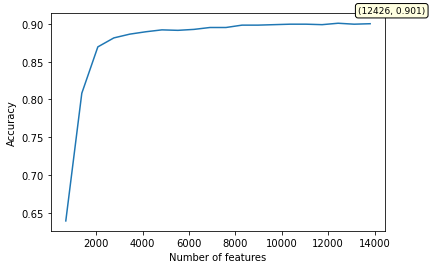

In [156]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,1, TfidfVectorizer, model = LinearSVC(dual='auto')) 
plot_features_vs_accuracy(feature_number, accuracies)

### the first time we got accuracy > 0.9 !!!!
the TfidfVectorizer might be better with this model

let's check other ranges and the sublinear_tf argument

this many features were found:  13807 

690 features (5%) -> Accuracy: 0.639375
1380 features (10%) -> Accuracy: 0.810625
2071 features (15%) -> Accuracy: 0.868125
2761 features (20%) -> Accuracy: 0.88125
3451 features (25%) -> Accuracy: 0.886875
4142 features (30%) -> Accuracy: 0.893125
4832 features (35%) -> Accuracy: 0.895625
5522 features (40%) -> Accuracy: 0.895
6213 features (45%) -> Accuracy: 0.895
6903 features (50%) -> Accuracy: 0.899375
7593 features (55%) -> Accuracy: 0.8975
8284 features (60%) -> Accuracy: 0.89875
8974 features (65%) -> Accuracy: 0.900625
9664 features (70%) -> Accuracy: 0.90125
10355 features (75%) -> Accuracy: 0.901875
11045 features (80%) -> Accuracy: 0.900625
11735 features (85%) -> Accuracy: 0.90125
12426 features (90%) -> Accuracy: 0.90125
13116 features (95%) -> Accuracy: 0.903125
13807 features (100%) -> Accuracy: 0.903125


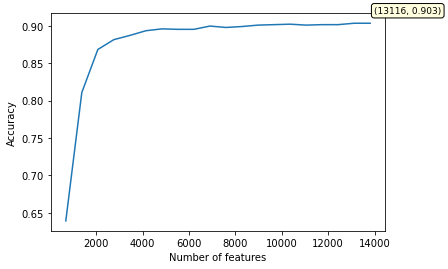

In [157]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,1, TfidfVectorizer,sub_tf=True, model = LinearSVC(dual='auto')) 
plot_features_vs_accuracy(feature_number, accuracies)

doesn't change much

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.894375
9640 features (10%) -> Accuracy: 0.903125
14460 features (15%) -> Accuracy: 0.905625
19280 features (20%) -> Accuracy: 0.905625
24100 features (25%) -> Accuracy: 0.91
28920 features (30%) -> Accuracy: 0.908125
33740 features (35%) -> Accuracy: 0.910625
38560 features (40%) -> Accuracy: 0.91
43380 features (45%) -> Accuracy: 0.910625
48200 features (50%) -> Accuracy: 0.91125
53020 features (55%) -> Accuracy: 0.9125
57840 features (60%) -> Accuracy: 0.91
62660 features (65%) -> Accuracy: 0.9075
67480 features (70%) -> Accuracy: 0.90625
72300 features (75%) -> Accuracy: 0.90625
77120 features (80%) -> Accuracy: 0.906875
81940 features (85%) -> Accuracy: 0.908125
86760 features (90%) -> Accuracy: 0.91
91580 features (95%) -> Accuracy: 0.90875
96401 features (100%) -> Accuracy: 0.90625


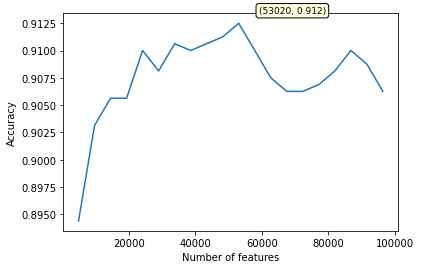

In [158]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, TfidfVectorizer, model = LinearSVC(dual='auto')) 
plot_features_vs_accuracy(feature_number, accuracies)

surprisingly with the range (1,2) it's better again, but we have to specify max_features

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.896875
9640 features (10%) -> Accuracy: 0.90625
14460 features (15%) -> Accuracy: 0.906875
19280 features (20%) -> Accuracy: 0.909375
24100 features (25%) -> Accuracy: 0.910625
28920 features (30%) -> Accuracy: 0.91125
33740 features (35%) -> Accuracy: 0.91125
38560 features (40%) -> Accuracy: 0.91
43380 features (45%) -> Accuracy: 0.9125
48200 features (50%) -> Accuracy: 0.9125
53020 features (55%) -> Accuracy: 0.91375
57840 features (60%) -> Accuracy: 0.910625
62660 features (65%) -> Accuracy: 0.908125
67480 features (70%) -> Accuracy: 0.9075
72300 features (75%) -> Accuracy: 0.90625
77120 features (80%) -> Accuracy: 0.908125
81940 features (85%) -> Accuracy: 0.90875
86760 features (90%) -> Accuracy: 0.91
91580 features (95%) -> Accuracy: 0.90875
96401 features (100%) -> Accuracy: 0.9075


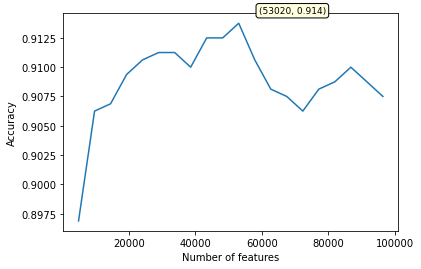

In [159]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, TfidfVectorizer,sub_tf=True, model = LinearSVC(dual='auto')) 
plot_features_vs_accuracy(feature_number, accuracies)

a little better again with the sublinear_tf=True

range(2,2)???

this many features were found:  82594 

4129 features (5%) -> Accuracy: 0.62375
8259 features (10%) -> Accuracy: 0.655
12389 features (15%) -> Accuracy: 0.661875
16518 features (20%) -> Accuracy: 0.63875
20648 features (25%) -> Accuracy: 0.645
24778 features (30%) -> Accuracy: 0.6425
28907 features (35%) -> Accuracy: 0.6425
33037 features (40%) -> Accuracy: 0.6375
37167 features (45%) -> Accuracy: 0.64125
41297 features (50%) -> Accuracy: 0.6425
45426 features (55%) -> Accuracy: 0.64875
49556 features (60%) -> Accuracy: 0.65
53686 features (65%) -> Accuracy: 0.6575
57815 features (70%) -> Accuracy: 0.66125
61945 features (75%) -> Accuracy: 0.660625
66075 features (80%) -> Accuracy: 0.665
70204 features (85%) -> Accuracy: 0.664375
74334 features (90%) -> Accuracy: 0.684375
78464 features (95%) -> Accuracy: 0.691875
82594 features (100%) -> Accuracy: 0.694375


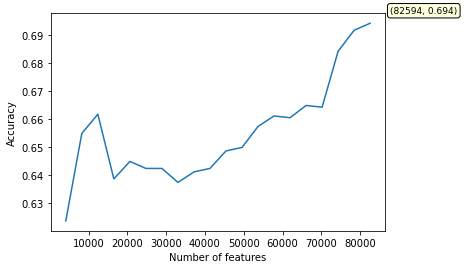

In [160]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(2,2, TfidfVectorizer,sub_tf=True, model = LinearSVC(dual='auto')) 
plot_features_vs_accuracy(feature_number, accuracies)

NOPE, sticking with single + double features

CountVectorizer with range=(1,2)

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.879375
9640 features (10%) -> Accuracy: 0.894375
14460 features (15%) -> Accuracy: 0.896875
19280 features (20%) -> Accuracy: 0.9
24100 features (25%) -> Accuracy: 0.900625
28920 features (30%) -> Accuracy: 0.89875
33740 features (35%) -> Accuracy: 0.9
38560 features (40%) -> Accuracy: 0.9025
43380 features (45%) -> Accuracy: 0.905
48200 features (50%) -> Accuracy: 0.90625
53020 features (55%) -> Accuracy: 0.905
57840 features (60%) -> Accuracy: 0.9075
62660 features (65%) -> Accuracy: 0.90625
67480 features (70%) -> Accuracy: 0.90375
72300 features (75%) -> Accuracy: 0.9025
77120 features (80%) -> Accuracy: 0.90625
81940 features (85%) -> Accuracy: 0.90625
86760 features (90%) -> Accuracy: 0.91
91580 features (95%) -> Accuracy: 0.909375
96401 features (100%) -> Accuracy: 0.9125


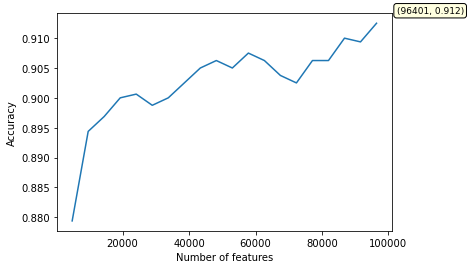

In [161]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, CountVectorizer, model = LinearSVC(dual='auto')) 
plot_features_vs_accuracy(feature_number, accuracies)

good as well

### experimenting with arguments of the model itself, using GridSearchCV

In [162]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

we also want the percents of all features possible for ranges (1,1) and (1,2), we have printed the numbers out before several times<br><br>
we cant check all percentages as it will take too much time

In [163]:
features_1_1 = [13807*k//100 for k in [15,30,50,55,95]]
features_1_2 = [96401*k//100 for k in [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]]

first CountVectorizer range (1,1) 

In [164]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1,1), stop_words='english')),
    ('classifier', LinearSVC(dual='auto'))
])

param_grid = {
    # 'vectorizer__max_features': features_1_1,
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1','l2'],
    'classifier__loss': ['hinge','squared_hinge'],
    'classifier__max_iter': [1000, 3000,5000, 10000]
}

In [165]:
grid = GridSearchCV(pipeline, param_grid, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/michalwietecki/opt/anaconda3

Best Parameters: {'classifier__C': 1, 'classifier__loss': 'squared_hinge', 'classifier__max_iter': 3000, 'classifier__penalty': 'l1'}
Best Score: 0.8943746042793413


In [166]:
best_model_1_1 = LinearSVC(C=1,
                           loss = 'squared_hinge',
                           max_iter = 5000,
                           penalty = 'l1',
                          dual = 'auto')

this many features were found:  13807 

690 features (5%) -> Accuracy: 0.6425
1380 features (10%) -> Accuracy: 0.81375
2071 features (15%) -> Accuracy: 0.86875
2761 features (20%) -> Accuracy: 0.884375
3451 features (25%) -> Accuracy: 0.8925
4142 features (30%) -> Accuracy: 0.90375
4832 features (35%) -> Accuracy: 0.90375
5522 features (40%) -> Accuracy: 0.90625
6213 features (45%) -> Accuracy: 0.90625
6903 features (50%) -> Accuracy: 0.906875
7593 features (55%) -> Accuracy: 0.9075
8284 features (60%) -> Accuracy: 0.9075
8974 features (65%) -> Accuracy: 0.90875
9664 features (70%) -> Accuracy: 0.909375


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


10355 features (75%) -> Accuracy: 0.910625
11045 features (80%) -> Accuracy: 0.9075
11735 features (85%) -> Accuracy: 0.90875
12426 features (90%) -> Accuracy: 0.9075
13116 features (95%) -> Accuracy: 0.906875
13807 features (100%) -> Accuracy: 0.905625


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


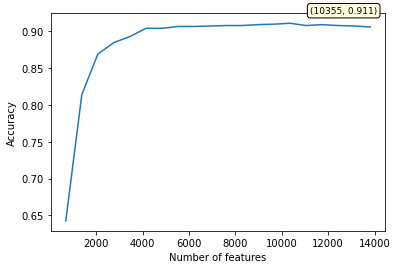

In [167]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,1, CountVectorizer, model = best_model_1_1) 
plot_features_vs_accuracy(feature_number, accuracies)

compared to previous scores it is even lower so we will not use GridSearch

let's at least try and use this model with TfidfVectorizer and different ranges

/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.900625
9640 features (10%) -> Accuracy: 0.910625
14460 features (15%) -> Accuracy: 0.91125


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


19280 features (20%) -> Accuracy: 0.91375
24100 features (25%) -> Accuracy: 0.913125
28920 features (30%) -> Accuracy: 0.914375
33740 features (35%) -> Accuracy: 0.9125
38560 features (40%) -> Accuracy: 0.91125


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


43380 features (45%) -> Accuracy: 0.910625


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


48200 features (50%) -> Accuracy: 0.91125
53020 features (55%) -> Accuracy: 0.91125
57840 features (60%) -> Accuracy: 0.910625
62660 features (65%) -> Accuracy: 0.913125
67480 features (70%) -> Accuracy: 0.91375


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


72300 features (75%) -> Accuracy: 0.915625
77120 features (80%) -> Accuracy: 0.914375


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


81940 features (85%) -> Accuracy: 0.915
86760 features (90%) -> Accuracy: 0.915


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


91580 features (95%) -> Accuracy: 0.91625
96401 features (100%) -> Accuracy: 0.914375


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


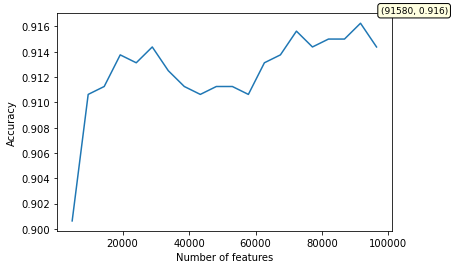

In [168]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, CountVectorizer, model = best_model_1_1) 
plot_features_vs_accuracy(feature_number, accuracies)

failed to converge in many iterations let's increase the max_iter

In [169]:
best_model_1_1 = LinearSVC(C=1,
                           loss = 'squared_hinge',
                           max_iter = 10000,
                           penalty = 'l1',
                          dual = 'auto')

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.89875
9640 features (10%) -> Accuracy: 0.910625
14460 features (15%) -> Accuracy: 0.91
19280 features (20%) -> Accuracy: 0.913125
24100 features (25%) -> Accuracy: 0.913125
28920 features (30%) -> Accuracy: 0.913125
33740 features (35%) -> Accuracy: 0.911875


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


38560 features (40%) -> Accuracy: 0.9125
43380 features (45%) -> Accuracy: 0.910625
48200 features (50%) -> Accuracy: 0.911875


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


53020 features (55%) -> Accuracy: 0.913125
57840 features (60%) -> Accuracy: 0.9125
62660 features (65%) -> Accuracy: 0.913125
67480 features (70%) -> Accuracy: 0.91375


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


72300 features (75%) -> Accuracy: 0.914375


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


77120 features (80%) -> Accuracy: 0.915


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


81940 features (85%) -> Accuracy: 0.911875


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


86760 features (90%) -> Accuracy: 0.914375


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


91580 features (95%) -> Accuracy: 0.916875
96401 features (100%) -> Accuracy: 0.913125


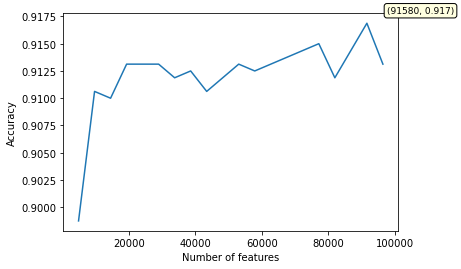

In [170]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, CountVectorizer, model = best_model_1_1) 
plot_features_vs_accuracy(feature_number, accuracies)

still cant converge, maybe we will try with the TfidfVectorizer

this many features were found:  13807 

690 features (5%) -> Accuracy: 0.644375
1380 features (10%) -> Accuracy: 0.82125
2071 features (15%) -> Accuracy: 0.87
2761 features (20%) -> Accuracy: 0.895625
3451 features (25%) -> Accuracy: 0.906875
4142 features (30%) -> Accuracy: 0.91125
4832 features (35%) -> Accuracy: 0.913125
5522 features (40%) -> Accuracy: 0.915
6213 features (45%) -> Accuracy: 0.915625
6903 features (50%) -> Accuracy: 0.91875
7593 features (55%) -> Accuracy: 0.918125
8284 features (60%) -> Accuracy: 0.916875
8974 features (65%) -> Accuracy: 0.91625
9664 features (70%) -> Accuracy: 0.9175
10355 features (75%) -> Accuracy: 0.9175
11045 features (80%) -> Accuracy: 0.916875
11735 features (85%) -> Accuracy: 0.91875
12426 features (90%) -> Accuracy: 0.918125
13116 features (95%) -> Accuracy: 0.918125
13807 features (100%) -> Accuracy: 0.916875


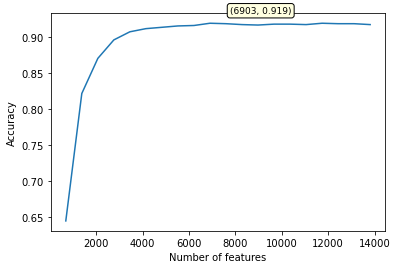

In [171]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,1, TfidfVectorizer, model = best_model_1_1) 
plot_features_vs_accuracy(feature_number, accuracies)

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.91
9640 features (10%) -> Accuracy: 0.916875
14460 features (15%) -> Accuracy: 0.920625
19280 features (20%) -> Accuracy: 0.919375
24100 features (25%) -> Accuracy: 0.91875
28920 features (30%) -> Accuracy: 0.920625
33740 features (35%) -> Accuracy: 0.921875
38560 features (40%) -> Accuracy: 0.920625
43380 features (45%) -> Accuracy: 0.920625
48200 features (50%) -> Accuracy: 0.920625


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


53020 features (55%) -> Accuracy: 0.921875
57840 features (60%) -> Accuracy: 0.9225
62660 features (65%) -> Accuracy: 0.923125
67480 features (70%) -> Accuracy: 0.921875
72300 features (75%) -> Accuracy: 0.920625
77120 features (80%) -> Accuracy: 0.92125
81940 features (85%) -> Accuracy: 0.92375
86760 features (90%) -> Accuracy: 0.92375
91580 features (95%) -> Accuracy: 0.923125
96401 features (100%) -> Accuracy: 0.924375


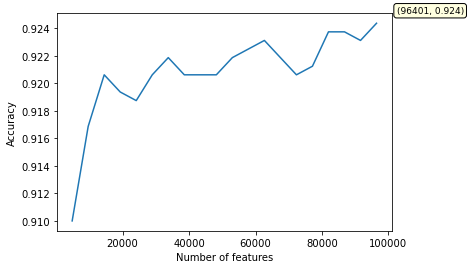

In [172]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, TfidfVectorizer, model = best_model_1_1) 
plot_features_vs_accuracy(feature_number, accuracies)

### accuracy = 0.924,  let's change a few args using this vectorizer and this range

In [173]:
model = LinearSVC(C=1,
                loss = 'squared_hinge',
                max_iter = 15000,
                penalty = 'l1',
                dual = 'auto')

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.91
9640 features (10%) -> Accuracy: 0.916875
14460 features (15%) -> Accuracy: 0.920625
19280 features (20%) -> Accuracy: 0.92
24100 features (25%) -> Accuracy: 0.919375
28920 features (30%) -> Accuracy: 0.920625
33740 features (35%) -> Accuracy: 0.921875
38560 features (40%) -> Accuracy: 0.920625
43380 features (45%) -> Accuracy: 0.920625
48200 features (50%) -> Accuracy: 0.92125
53020 features (55%) -> Accuracy: 0.9225
57840 features (60%) -> Accuracy: 0.921875
62660 features (65%) -> Accuracy: 0.923125
67480 features (70%) -> Accuracy: 0.921875
72300 features (75%) -> Accuracy: 0.92
77120 features (80%) -> Accuracy: 0.92125
81940 features (85%) -> Accuracy: 0.92375
86760 features (90%) -> Accuracy: 0.924375
91580 features (95%) -> Accuracy: 0.923125
96401 features (100%) -> Accuracy: 0.924375


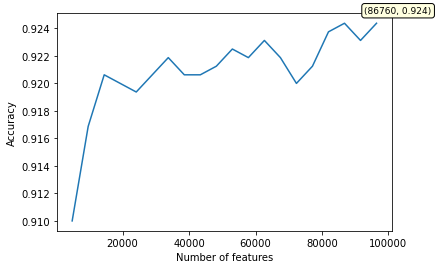

In [174]:
[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, TfidfVectorizer, model = model) 
plot_features_vs_accuracy(feature_number, accuracies)

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.90125
9640 features (10%) -> Accuracy: 0.91125
14460 features (15%) -> Accuracy: 0.913125
19280 features (20%) -> Accuracy: 0.91
24100 features (25%) -> Accuracy: 0.910625
28920 features (30%) -> Accuracy: 0.91125
33740 features (35%) -> Accuracy: 0.911875
38560 features (40%) -> Accuracy: 0.911875
43380 features (45%) -> Accuracy: 0.910625
48200 features (50%) -> Accuracy: 0.911875
53020 features (55%) -> Accuracy: 0.91125
57840 features (60%) -> Accuracy: 0.910625
62660 features (65%) -> Accuracy: 0.908125
67480 features (70%) -> Accuracy: 0.908125
72300 features (75%) -> Accuracy: 0.906875
77120 features (80%) -> Accuracy: 0.9075
81940 features (85%) -> Accuracy: 0.9075
86760 features (90%) -> Accuracy: 0.91
91580 features (95%) -> Accuracy: 0.909375
96401 features (100%) -> Accuracy: 0.910625


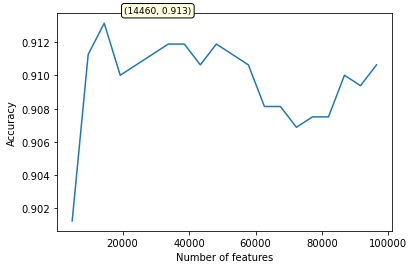

In [207]:
model = LinearSVC(C=1,
                loss = 'hinge',
                max_iter = 15000,
                penalty = 'l2',
                dual = 'auto')

[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, TfidfVectorizer, model = model) 
plot_features_vs_accuracy(feature_number, accuracies)

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.891875
9640 features (10%) -> Accuracy: 0.904375
14460 features (15%) -> Accuracy: 0.91125
19280 features (20%) -> Accuracy: 0.914375
24100 features (25%) -> Accuracy: 0.909375
28920 features (30%) -> Accuracy: 0.910625
33740 features (35%) -> Accuracy: 0.909375


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


38560 features (40%) -> Accuracy: 0.91375


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


43380 features (45%) -> Accuracy: 0.91625


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


48200 features (50%) -> Accuracy: 0.91375
53020 features (55%) -> Accuracy: 0.915625
57840 features (60%) -> Accuracy: 0.914375
62660 features (65%) -> Accuracy: 0.914375
67480 features (70%) -> Accuracy: 0.918125


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


72300 features (75%) -> Accuracy: 0.91875
77120 features (80%) -> Accuracy: 0.918125
81940 features (85%) -> Accuracy: 0.91875
86760 features (90%) -> Accuracy: 0.915625


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


91580 features (95%) -> Accuracy: 0.9175
96401 features (100%) -> Accuracy: 0.915625


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


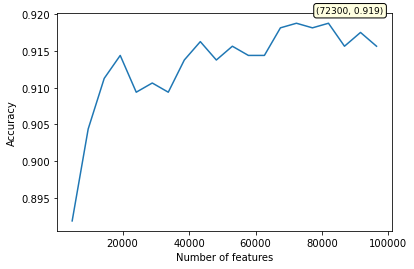

In [176]:
model = LinearSVC(C=3,
                loss = 'squared_hinge',
                max_iter = 15000,
                penalty = 'l1',
                dual = 'auto')

[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, TfidfVectorizer, model = model) 
plot_features_vs_accuracy(feature_number, accuracies)

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.886875
9640 features (10%) -> Accuracy: 0.8975
14460 features (15%) -> Accuracy: 0.898125
19280 features (20%) -> Accuracy: 0.90375
24100 features (25%) -> Accuracy: 0.905
28920 features (30%) -> Accuracy: 0.906875
33740 features (35%) -> Accuracy: 0.908125
38560 features (40%) -> Accuracy: 0.9075
43380 features (45%) -> Accuracy: 0.90875
48200 features (50%) -> Accuracy: 0.90875
53020 features (55%) -> Accuracy: 0.909375
57840 features (60%) -> Accuracy: 0.9075
62660 features (65%) -> Accuracy: 0.906875
67480 features (70%) -> Accuracy: 0.908125
72300 features (75%) -> Accuracy: 0.908125
77120 features (80%) -> Accuracy: 0.90875
81940 features (85%) -> Accuracy: 0.9075
86760 features (90%) -> Accuracy: 0.909375
91580 features (95%) -> Accuracy: 0.906875
96401 features (100%) -> Accuracy: 0.9075


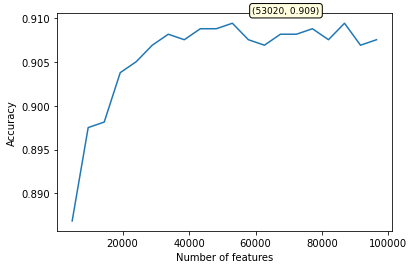

In [177]:
model = LinearSVC(C=2,
                loss = 'squared_hinge',
                max_iter = 15000,
                penalty = 'l2',
                dual = 'auto')

[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, TfidfVectorizer, model = model) 
plot_features_vs_accuracy(feature_number, accuracies)

maybe sublinear_tf = True?

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.908125
9640 features (10%) -> Accuracy: 0.9175
14460 features (15%) -> Accuracy: 0.921875
19280 features (20%) -> Accuracy: 0.92
24100 features (25%) -> Accuracy: 0.918125
28920 features (30%) -> Accuracy: 0.92
33740 features (35%) -> Accuracy: 0.92125
38560 features (40%) -> Accuracy: 0.923125
43380 features (45%) -> Accuracy: 0.9225
48200 features (50%) -> Accuracy: 0.921875
53020 features (55%) -> Accuracy: 0.92375
57840 features (60%) -> Accuracy: 0.925
62660 features (65%) -> Accuracy: 0.925
67480 features (70%) -> Accuracy: 0.924375
72300 features (75%) -> Accuracy: 0.923125
77120 features (80%) -> Accuracy: 0.921875
81940 features (85%) -> Accuracy: 0.925
86760 features (90%) -> Accuracy: 0.92375
91580 features (95%) -> Accuracy: 0.924375
96401 features (100%) -> Accuracy: 0.925


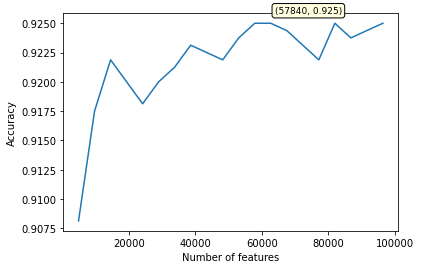

In [178]:
model = LinearSVC(C=1,
                loss = 'squared_hinge',
                max_iter = 15000,
                penalty = 'l1',
                dual = 'auto')

[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, TfidfVectorizer, model = model, sub_tf=True) 
plot_features_vs_accuracy(feature_number, accuracies)

a little bit better, we will take 100% of the features as we have a tie

### for now the best model is:
for now the best one is:<br>
BEST_model = Pipeline([
                ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), stop_words='english', sublinear_tf=True)), <br>
                ('classifier', LinearSVC(C=1,<br>
                loss = 'squared_hinge',<br>
                max_iter = 15000,<br>
                penalty = 'l1',<br>
                dual = 'auto'))<br>
                ])

In [179]:
BEST_model = Pipeline([
                ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), stop_words='english', sublinear_tf=True)), 
                ('classifier', LinearSVC(C=1,
                loss = 'squared_hinge',
                max_iter = 15000,
                penalty = 'l1',
                dual = 'auto'))
                ])

In [188]:
best_Multinomial = Pipeline([
            ('vectorizer', CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features = 9640)),
            ('classifier', MultinomialNB(alpha = 0.5))
        ])

# XGBClassifier

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.9
9640 features (10%) -> Accuracy: 0.901875
14460 features (15%) -> Accuracy: 0.901875
19280 features (20%) -> Accuracy: 0.901875
24100 features (25%) -> Accuracy: 0.901875
28920 features (30%) -> Accuracy: 0.901875
33740 features (35%) -> Accuracy: 0.901875
38560 features (40%) -> Accuracy: 0.901875
43380 features (45%) -> Accuracy: 0.901875
48200 features (50%) -> Accuracy: 0.901875
53020 features (55%) -> Accuracy: 0.901875
57840 features (60%) -> Accuracy: 0.901875
62660 features (65%) -> Accuracy: 0.901875
67480 features (70%) -> Accuracy: 0.901875
72300 features (75%) -> Accuracy: 0.901875
77120 features (80%) -> Accuracy: 0.901875
81940 features (85%) -> Accuracy: 0.901875
86760 features (90%) -> Accuracy: 0.901875
91580 features (95%) -> Accuracy: 0.901875
96401 features (100%) -> Accuracy: 0.901875


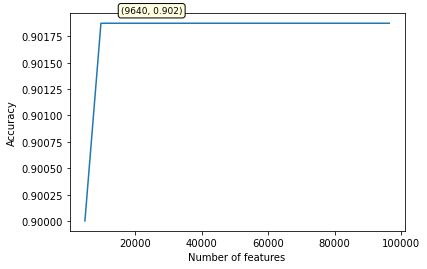

In [217]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=6)

[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, CountVectorizer, model = model, sub_tf=True) 
plot_features_vs_accuracy(feature_number, accuracies)

In [ ]:
# param_dist = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'subsample': [0.7, 1.0],
#     'colsample_bytree': [0.7, 1.0],
#     'gamma': [0, 1],
#     'reg_alpha': [0, 0.5, 1],
#     'reg_lambda': [0.1, 1, 10]
# }

# search = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
#                             param_distributions=param_dist,
#                             n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# search.fit(X_train_vec, y_train_enc)

# print("Best Parameters:", search.best_params_)

this many features were found:  13807 

690 features (5%) -> Accuracy: 0.66
1380 features (10%) -> Accuracy: 0.82125
2071 features (15%) -> Accuracy: 0.87375
2761 features (20%) -> Accuracy: 0.8875
3451 features (25%) -> Accuracy: 0.89375
4142 features (30%) -> Accuracy: 0.898125
4832 features (35%) -> Accuracy: 0.89625
5522 features (40%) -> Accuracy: 0.89625
6213 features (45%) -> Accuracy: 0.89625
6903 features (50%) -> Accuracy: 0.89625
7593 features (55%) -> Accuracy: 0.89625
8284 features (60%) -> Accuracy: 0.89625
8974 features (65%) -> Accuracy: 0.89625
9664 features (70%) -> Accuracy: 0.89625
10355 features (75%) -> Accuracy: 0.89625
11045 features (80%) -> Accuracy: 0.89625
11735 features (85%) -> Accuracy: 0.89625
12426 features (90%) -> Accuracy: 0.89625
13116 features (95%) -> Accuracy: 0.89625
13807 features (100%) -> Accuracy: 0.89625


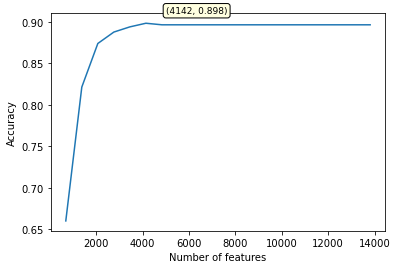

In [211]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=5)

[feature_number,accuracies] = vectorizer_ngram_stopwords(1,1, CountVectorizer, model = model, sub_tf=True) 
plot_features_vs_accuracy(feature_number, accuracies)

this many features were found:  13807 

690 features (5%) -> Accuracy: 0.64125
1380 features (10%) -> Accuracy: 0.81
2071 features (15%) -> Accuracy: 0.875
2761 features (20%) -> Accuracy: 0.881875
3451 features (25%) -> Accuracy: 0.894375
4142 features (30%) -> Accuracy: 0.893125
4832 features (35%) -> Accuracy: 0.890625
5522 features (40%) -> Accuracy: 0.889375
6213 features (45%) -> Accuracy: 0.8925
6903 features (50%) -> Accuracy: 0.8975
7593 features (55%) -> Accuracy: 0.895
8284 features (60%) -> Accuracy: 0.89875
8974 features (65%) -> Accuracy: 0.895625
9664 features (70%) -> Accuracy: 0.895625
10355 features (75%) -> Accuracy: 0.9
11045 features (80%) -> Accuracy: 0.89875
11735 features (85%) -> Accuracy: 0.894375
12426 features (90%) -> Accuracy: 0.891875
13116 features (95%) -> Accuracy: 0.894375
13807 features (100%) -> Accuracy: 0.895


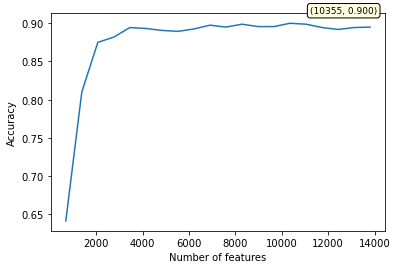

In [219]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=6)

[feature_number,accuracies] = vectorizer_ngram_stopwords(1,1, TfidfVectorizer, model = model, sub_tf=True) 
plot_features_vs_accuracy(feature_number, accuracies)

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.891875
9640 features (10%) -> Accuracy: 0.8975
14460 features (15%) -> Accuracy: 0.904375
19280 features (20%) -> Accuracy: 0.899375
24100 features (25%) -> Accuracy: 0.9
28920 features (30%) -> Accuracy: 0.89875
33740 features (35%) -> Accuracy: 0.898125
38560 features (40%) -> Accuracy: 0.901875
43380 features (45%) -> Accuracy: 0.901875
48200 features (50%) -> Accuracy: 0.899375
53020 features (55%) -> Accuracy: 0.89875
57840 features (60%) -> Accuracy: 0.9025
62660 features (65%) -> Accuracy: 0.90375
67480 features (70%) -> Accuracy: 0.899375
72300 features (75%) -> Accuracy: 0.904375
77120 features (80%) -> Accuracy: 0.901875
81940 features (85%) -> Accuracy: 0.89125
86760 features (90%) -> Accuracy: 0.895625
91580 features (95%) -> Accuracy: 0.89125
96401 features (100%) -> Accuracy: 0.896875


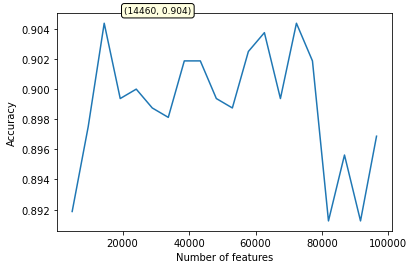

In [220]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=6)

[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, TfidfVectorizer, model = model, sub_tf=True) 
plot_features_vs_accuracy(feature_number, accuracies)

this many features were found:  96401 

4820 features (5%) -> Accuracy: 0.895625
9640 features (10%) -> Accuracy: 0.901875
14460 features (15%) -> Accuracy: 0.90125
19280 features (20%) -> Accuracy: 0.9025
24100 features (25%) -> Accuracy: 0.905
28920 features (30%) -> Accuracy: 0.904375
33740 features (35%) -> Accuracy: 0.9075
38560 features (40%) -> Accuracy: 0.9075
43380 features (45%) -> Accuracy: 0.90875
48200 features (50%) -> Accuracy: 0.90375
53020 features (55%) -> Accuracy: 0.903125
57840 features (60%) -> Accuracy: 0.901875
62660 features (65%) -> Accuracy: 0.903125
67480 features (70%) -> Accuracy: 0.904375
72300 features (75%) -> Accuracy: 0.903125
77120 features (80%) -> Accuracy: 0.896875
81940 features (85%) -> Accuracy: 0.903125
86760 features (90%) -> Accuracy: 0.895
91580 features (95%) -> Accuracy: 0.900625
96401 features (100%) -> Accuracy: 0.899375


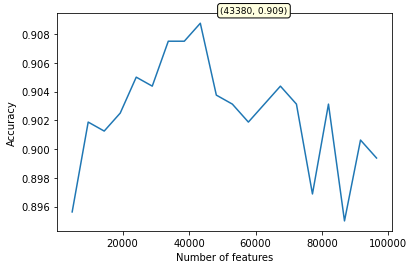

In [222]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=6)

[feature_number,accuracies] = vectorizer_ngram_stopwords(1,2, TfidfVectorizer, model = model, sub_tf=False) 
plot_features_vs_accuracy(feature_number, accuracies)

best model is the one specified below

In [234]:
best_xgb = Pipeline([
            ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features = 43380)),
            ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=6))
        ])

## voting classifier
creating a voting classifier out of the 3 best models, each one is a different model type

In [232]:
BEST_model = Pipeline([
                ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), stop_words='english', sublinear_tf=True)), 
                ('classifier', LinearSVC(C=1,
                loss = 'squared_hinge',
                max_iter = 15000,
                penalty = 'l1',
                dual = 'auto'))
                ])

best_Multinomial = Pipeline([
            ('vectorizer', CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features = 9640)),
            ('classifier', MultinomialNB(alpha = 0.5))
        ])

best_xgb = Pipeline([
            ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features = 43380)),
            ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=6))
        ])

In [235]:
from sklearn.linear_model import LogisticRegression

voting_clf = VotingClassifier(estimators=[
    ('multi', best_Multinomial),
    ('svm', BEST_model),
    ('xgb', best_xgb)
    
], voting='hard')
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Voting accuracy:", acc)


Voting accuracy: 0.9175


cross validation score on the voting classifier:

In [236]:
scores = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validated accuracies:", scores)
print("Mean accuracy: {:.4f}".format(np.mean(scores)))

Cross-validated accuracies: [0.91484375 0.90546875 0.91953125 0.896875   0.89375   ]
Mean accuracy: 0.9061


maybe lower max_features by 1/5 in each one a little bit to adapt to cross validation

In [240]:
BEST_model_1 = Pipeline([
                ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), stop_words='english', sublinear_tf=True, max_features = 77120)), 
                ('classifier', LinearSVC(C=1,
                loss = 'squared_hinge',
                max_iter = 15000,
                penalty = 'l1',
                dual = 'auto'))
                ])

best_Multinomial_1 = Pipeline([
            ('vectorizer', CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features = 7712)),
            ('classifier', MultinomialNB(alpha = 0.5))
        ])

best_xgb_1 = Pipeline([
            ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features = 34704)),
            ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=6))
        ])


voting_clf_1 = VotingClassifier(estimators=[
    ('multi', best_Multinomial_1),
    ('svm', BEST_model_1),
    ('xgb', best_xgb_1)
    
], voting='hard')
voting_clf_1.fit(X_train, y_train)

y_pred = voting_clf_1.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Voting accuracy:", acc)


Voting accuracy: 0.9175


In [241]:
scores = cross_val_score(voting_clf_1, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validated accuracies:", scores)
print("Mean accuracy: {:.4f}".format(np.mean(scores)))

Cross-validated accuracies: [0.9078125  0.903125   0.9125     0.89765625 0.89296875]
Mean accuracy: 0.9028


# final model:

voting_clf = VotingClassifier(estimators=[<br>
    ('multi', best_Multinomial),<br>
    ('svm', BEST_model),<br>
    ('xgb', best_xgb)<br>
], voting='hard')<br><br>

where:<br><br>

BEST_model = Pipeline([<br>
                ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), stop_words='english', sublinear_tf=True)), <br>
                ('classifier', LinearSVC(C=1,<br>
                loss = 'squared_hinge',<br>
                max_iter = 15000,<br>
                penalty = 'l1',<br>
                dual = 'auto'))<br>
                ])<br><br>

best_Multinomial = Pipeline([<br>
            ('vectorizer', CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features = 9640)),<br>
            ('classifier', MultinomialNB(alpha = 0.5))<br>
        ])<br><br>

best_xgb = Pipeline([<br>
            ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features = 43380)),<br>
            ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=6))<br>
        ])<br>